<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm
import os
import warnings
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings('ignore')

In [3]:
pth1 = r'C:\Users\kisaz\OneDrive\Рабочий стол\sber\Python\ds-python-main\ds-python-main\lesson 3\hometask\test_cluster.csv'
pth2 = '........'

if os.path.exists(pth1):
    df = pd.read_csv(pth1,encoding='cp1251', sep=';')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:
def welcome (df):
    '''Функция получения первичной информации о датафрейме'''
    print ('------------- Первые 5 строк ------------')
    display(df.head())
    print('')
    print('')
    print ('------------- Типы данных ------------')
    print (df.info())
    print('')
    print('')
    print ('------------- Пропуски ------------')
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count = +1
        if count == 0:
            print('Пропусков НЕТ')
    print('')
    print('')
    display(pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm'))

In [5]:
welcome(df)

------------- Первые 5 строк ------------


,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562




------------- Типы данных ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64


,0
age,0.000000
gender,1.000000
city_type,0.000000
full_mob,0.000000
ml_balance,0.000000
cl_balance_0m,0.000000
loan_balance_0m,0.000000
td_balance_0m,0.000000
casa_balance_0m,0.000000
dc_trx_cnt,0.000000


In [6]:
corr=df.corr()

In [7]:
corr.head()

,age,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
age,1.000000,0.278095,0.005730,0.003346,0.010135,0.049813,0.026663,-0.117706,0.030522,0.009509,...,0.012036,0.011414,0.017393,0.006262,0.004197,0.011367,-0.041340,0.103702,0.000874,0.061660
full_mob,0.278095,1.000000,0.066694,0.095045,0.130913,0.013962,0.011671,0.067083,0.114933,0.010622,...,0.129737,0.138456,0.147058,0.096175,0.100781,0.112798,0.032183,0.032694,-0.005283,0.110472
ml_balance,0.005730,0.066694,1.000000,0.001244,0.658112,-0.002642,-0.001646,-0.020220,-0.009454,0.000373,...,0.681781,0.637054,0.711416,0.000881,0.000842,0.001720,0.389744,0.005684,-0.000557,0.092858
cl_balance_0m,0.003346,0.095045,0.001244,1.000000,0.733257,-0.011878,-0.005663,0.078812,0.086093,0.028787,...,0.686226,0.721025,0.591382,0.960047,0.985302,0.901052,0.185143,0.036264,-0.002494,0.378223
loan_balance_0m,0.010135,0.130913,0.658112,0.733257,1.000000,-0.011178,-0.005749,0.046519,0.069562,0.022902,...,0.979519,0.977384,0.932125,0.705331,0.722479,0.664858,0.425271,0.041081,0.001041,0.369049


In [8]:
def quant(val):
    return df.loc[(df[val]>=df[val].quantile(.05))&(df[val]<=df[val].quantile(.95)),val]
           

In [9]:
def bins_all(df,var):
    if df[var].max()>100:
        return 50
    elif df[var].max()>500:
        return 100
    elif df[var].max()>1000:
        return 200
    return 20

In [10]:
def my_hist(df,val):
    coef_bins = 0.005
    plt.figure(figsize=(6,4))
    quant(val).plot(kind='hist',
              bins=bins_all(df,val),
              ec='black',
              color='orange')
    plt.axvline(x=quant(val).median(),
               color='green')
    plt.axvline(x=quant(val).quantile(0.05))
    plt.axvline(x=quant(val).quantile(0.95))
    plt.title('Распределение по столбцу '+ val)
    plt.xlabel(val)
    plt.ylabel('Частота')
    plt.grid()

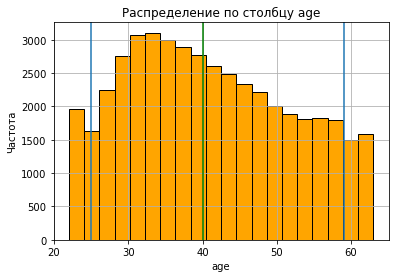

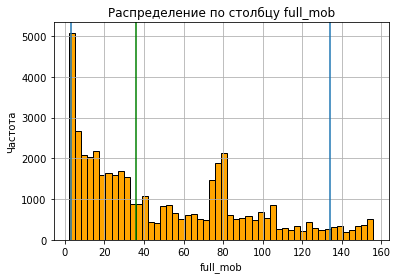

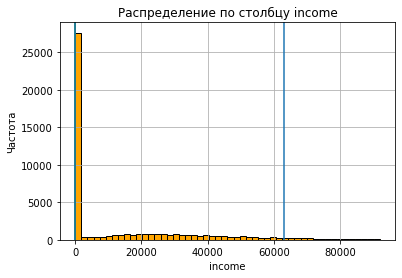

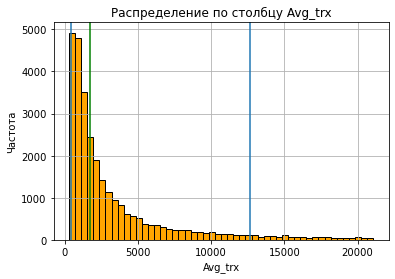

In [11]:
eda_list=['age','full_mob','income','Avg_trx']
for i in  eda_list:
    my_hist(df,i)

In [12]:
gen=df.groupby(['gender'])['casa_balance_0m'].mean()

In [13]:
ci_t=df.groupby(['city_type'])['income'].mean()

In [14]:
age_a=df.groupby('age')['full_mob'].median()

In [15]:
cy_av=df.groupby('city_type')['Avg_trx','casa_balance_0m'].mean()

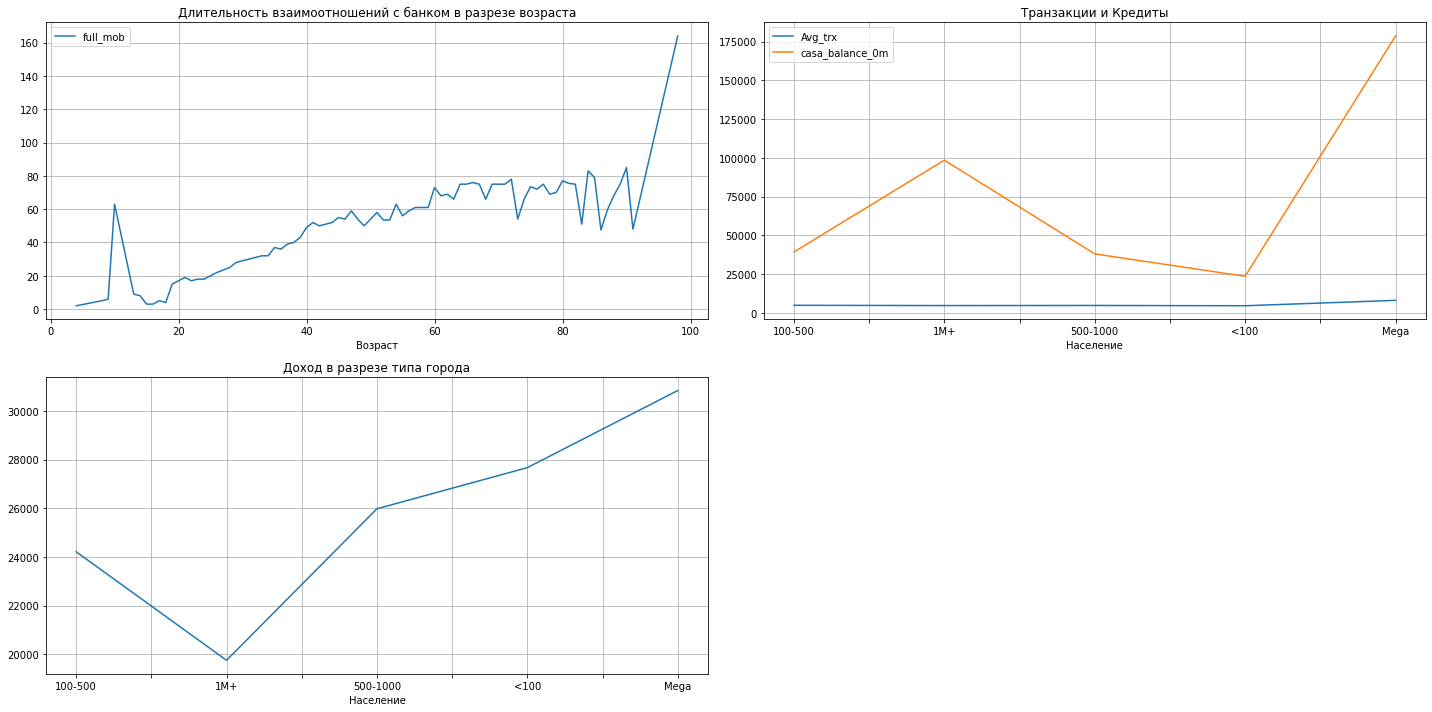

In [16]:
plt.figure(figsize=(20, 10))

ax1 = plt.subplot(2,2,1)
age_a.plot(grid=True, ax=ax1)
plt.legend()
plt.xlabel('Возраст')
plt.title('Длительность взаимоотношений с банком в разрезе возраста')

        # второй график — динамика конверсии
ax2 = plt.subplot(2,2,2)
cy_av.plot(grid=True, ax=ax2, kind='line')
plt.xlabel('Население')
plt.title('Транзакции и Кредиты')

ax3 = plt.subplot(2,2,3)
ci_t.plot(grid=True, ax=ax3)
plt.xlabel('Население')
plt.title('Доход в разрезе типа города')

plt.tight_layout()
plt.show() 

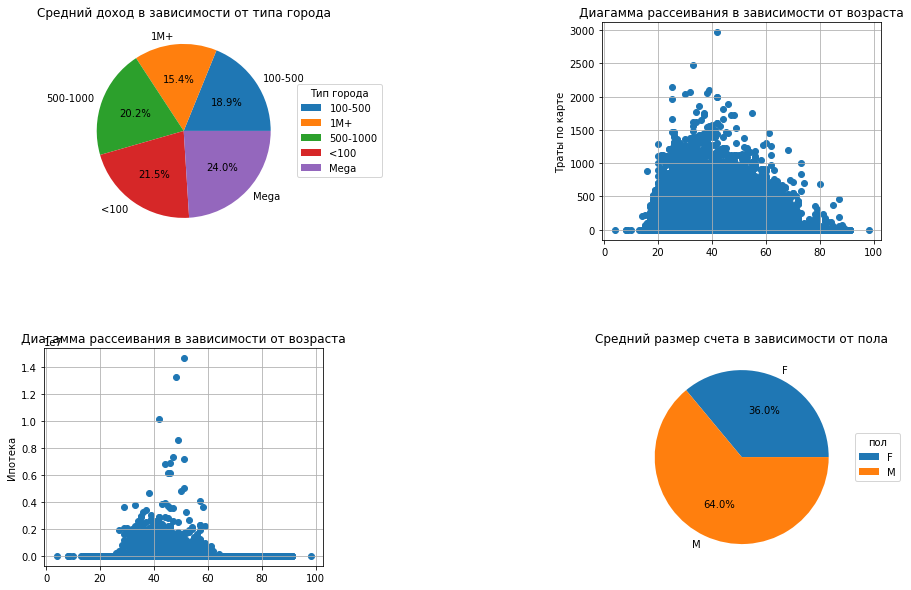

In [17]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
axes[0,0].set_title('Средний доход в зависимости от типа города')
axes[0,0].pie(ci_t.head(8),autopct='%1.1f%%',labels=ci_t.index.to_list()[0:8])
axes[0,0].legend(title='Тип города',
                loc='center left',
                bbox_to_anchor=(1,0,0.5,1))
axes[0,1].set_ylabel('Возраст')
axes[0,1].set_ylabel('Траты по карте')
axes[0,1].set_title('Диагамма рассеивания в зависимости от возраста')
axes[0,1].scatter(x=df['age'],y=df['dc_trx_cnt'])
axes[0,1].grid()
plt.subplots_adjust(wspace=0.1,hspace=0.5)

axes[1,0].set_ylabel('Возраст')
axes[1,0].set_ylabel('Ипотека')
axes[1,0].set_title('Диагамма рассеивания в зависимости от возраста')
axes[1,0].scatter(x=df['age'],y=df['ml_balance'])
axes[1,0].grid()
plt.subplots_adjust(wspace=0.1,hspace=0.5)

axes[1,1].set_title('Средний размер счета в зависимости от пола')
axes[1,1].pie(gen,autopct='%1.1f%%',labels=gen.index.to_list())
axes[1,1].legend(title='пол',
                loc='center left',
                bbox_to_anchor=(1,0,0.5,1))
plt.subplots_adjust(wspace=1)

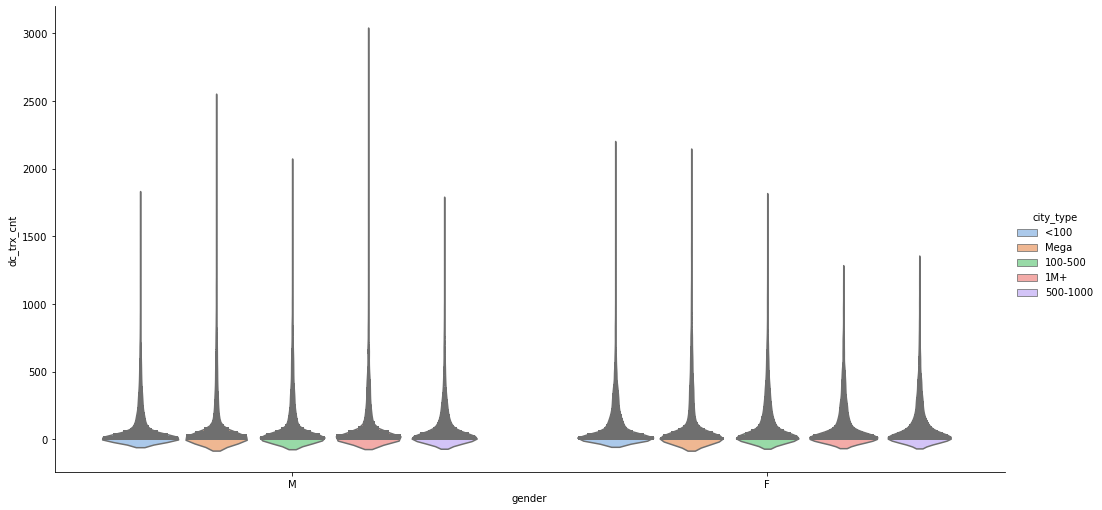

In [18]:
sns.catplot(
    x='gender', 
    y='dc_trx_cnt', 
    data=df, 
    kind='violin', 
    hue='city_type', 
    hue_order=['<100', 'Mega', '100-500', '1M+', '500-1000'], 
    split=False,
    inner="stick", 
    palette="pastel",
    height=7, 
    aspect=2); 


<Figure size 1440x1080 with 0 Axes>

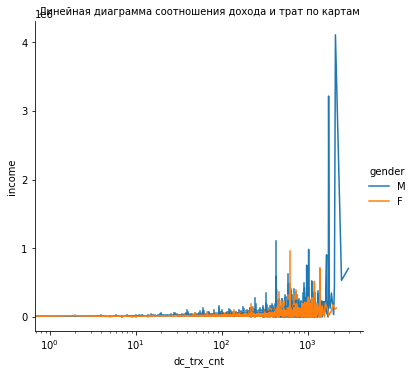

In [19]:
plt.figure(figsize=(20, 15))
sns.relplot(
    x='dc_trx_cnt', 
    y='income', 
    hue='gender', 
    data=df, 
    kind='line',
    err_style="bars", 
    ci=95)   
plt.title('Линейная диаграмма соотношения дохода и трат по картам', size=10)
plt.xscale(value='log');

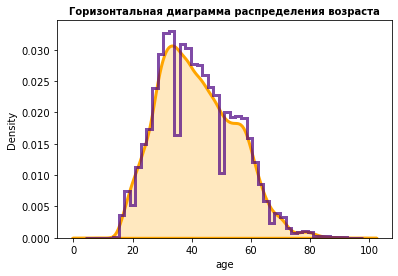

In [20]:
sns.distplot(
    df.age,
    vertical=False,                #hist=False
    hist_kws={"histtype": "step", "linewidth": 3, "alpha": 0.7, "color": "indigo", "label": "Histogram"},
    kde_kws={"shade": True, "color": "orange", "lw": 3, "label": "KDE"}
)           
plt.title('Горизонтальная диаграмма распределения возраста', size=10, weight='bold')             
plt.show();

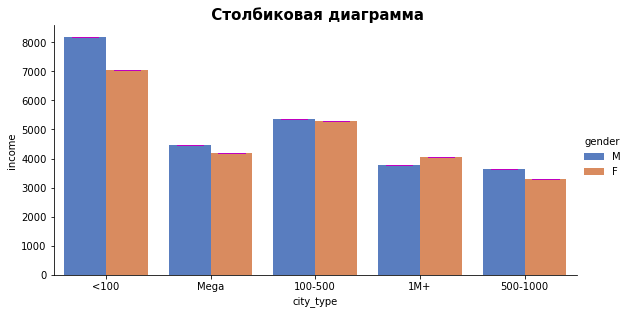

In [21]:
sns.catplot(
    x='city_type', 
    y='income', 
    data=df, 
    kind='bar', 
    hue='gender', 
    estimator=len, 
    capsize=0.25, 
    errcolor='m', 
    errwidth=1, 
    palette="muted", 
    height=4, 
    aspect=2);
plt.title(' Столбиковая диаграмма',
          size=15, 
          weight='bold'
         );

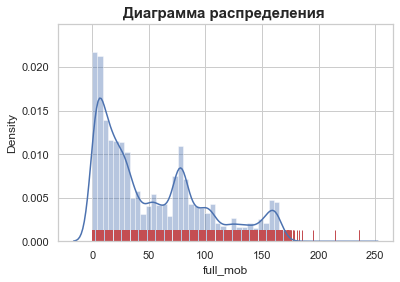

In [22]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.full_mob,
    color='b', 
    rug=True, 
    rug_kws={"color": 'r', "height": 0.05}
)
plt.title('Диаграмма распределения ', size=15, weight='bold')
plt.show();

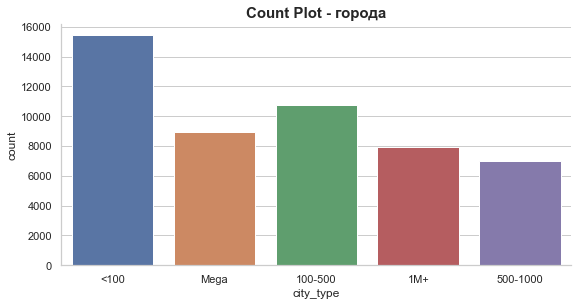

In [23]:
sns.catplot(x='city_type', 
            data=df, 
            kind='count', 
            height=4, 
            aspect=2
           );  # long form data frame
plt.title('Count Plot - города', size=15, weight='bold');

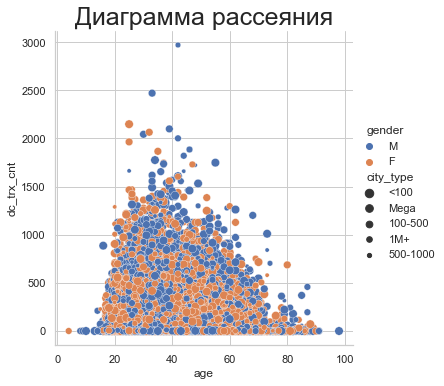

In [24]:
sns.relplot(
    x='age',
    y='dc_trx_cnt',
    hue='gender',
    #style='weekend',
    size='city_type',
    markers=['^', 'D'],
    data=df
)

plt.title('Диаграмма рассеяния', size=25);

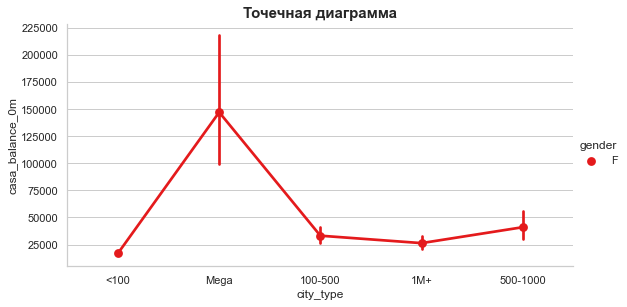

In [25]:

sns.catplot(
    x='city_type', 
    y='casa_balance_0m', 
    data=df, 
    kind='point', 
    hue='gender',
    dodge=False,
    hue_order=['F'], 
    palette="Set1", 
    height=4, 
    aspect=2)
plt.title( 'Точечная диаграмма', size=15, weight='bold');

In [26]:
df=df.drop(columns={'loan_to_deposit'})

In [32]:
new_df = pd.get_dummies(data=df, columns=['gender', 'city_type'])

In [30]:
new_df['Avg_trx']=new_df['Avg_trx'].fillna(new_df['Avg_trx'].median())
new_df['avgtrx_to_balance']=new_df['avgtrx_to_balance'].fillna(new_df['avgtrx_to_balance'].median())
new_df['nbi']=new_df['nbi'].fillna(new_df['nbi'].median())
new_df['age']=new_df['age'].fillna(new_df['age'].median())

In [40]:
km = KMeans(n_clusters=10, random_state=200,init='k-means++')

In [41]:
pred=km.fit_predict(new_df)

In [42]:
new_df['cluster'] = pred

In [43]:
new_df['cluster'].value_counts(normalize=True)

7    0.910889
0    0.069671
9    0.017197
4    0.000850
6    0.000816
8    0.000238
5    0.000238
3    0.000034
2    0.000034
1    0.000034
Name: cluster, dtype: float64